In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


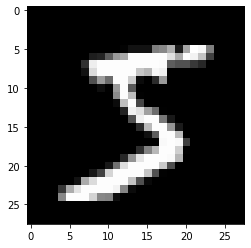

5


In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [5]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 146s 77ms/step - loss: 0.3289 - accuracy: 0.9554 - val_loss: 0.0857 - val_accuracy: 0.9737
Epoch 2/3
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0569 - accuracy: 0.9832 - val_loss: 0.0853 - val_accuracy: 0.9763
Epoch 3/3
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0921 - val_accuracy: 0.9785


Prediction (Softmax) from the neural network:

 [[1.0000000e+00 1.4466779e-16 5.4410275e-11 7.9217681e-15 1.3054840e-17
  4.9097392e-15 4.2432071e-09 2.6925197e-17 1.4160266e-11 8.6363798e-14]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




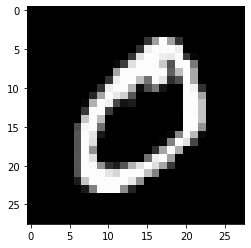



Final Output: 0


In [16]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
cd MyDrive/Colab Notebooks/Handwritten Text Reader Advanced/test_data

/content/gdrive/MyDrive/Colab Notebooks/Handwritten Text Reader Advanced/test_data


In [50]:
ls

number4.png  number5.png





----------------Contoured Image--------------------


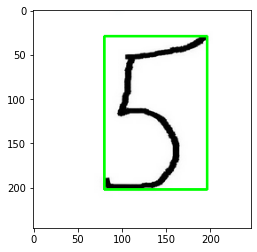

In [77]:
image = cv2.imread('number5.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




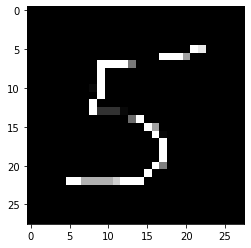



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.85708228e-16 1.01208824e-16 5.33679546e-15 7.35692410e-11
  3.26643632e-17 1.00000000e+00 2.07191941e-19 3.60644864e-13
  1.41967471e-11 6.97346861e-21]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [78]:
for digit in preprocessed_digits:
  prediction = model.predict(digit.reshape(1, 28, 28, 1))
  print ("\n\n---------------------------------------\n\n")
  print ("=========PREDICTION============ \n\n")
  plt.imshow(digit.reshape(28, 28), cmap="gray")
  plt.show()
  print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
  print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
  hard_maxed_prediction = np.zeros(prediction.shape)
  hard_maxed_prediction[0][np.argmax(prediction)] = 1
  print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
  print ("\n\n---------------------------------------\n\n")